In [61]:
# Importing packages
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import WeibullAFTFitter
from lifelines import LogLogisticAFTFitter
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sb

In [8]:
# Loading in dataset
df = pd.read_csv(r'C:\Users\ryant\OneDrive\Documents\SOR4007\S1Data.csv')
df.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [9]:
# Fixing spelling in platelets column
df = df.rename(columns={'Pletelets': 'Platelets'})

In [10]:
df

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


In [34]:
print(df['Ejection.Fraction'].unique())

[50 30 20 25 60 15 40 38 45 35 62 65 70 17 55 80 14]



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                        test_statistic    p  -log2(p)
Age               km              0.11 0.74      0.43
                  rank            0.03 0.86      0.21
Anaemia           km              0.00 1.00      0.00
                  rank            0.01 0.93      0.11
BP                km              0.11 0.74      0.44
                  rank            0.11 0.74      0.44
CPK               km              1.13 0.29      1.79
                  rank            1.11 0.29      1.77
Creatinine        km              3.22 0.07      3.78
                  rank            3.48 0.06      4.00
Diabetes          km              0.04 0.84      0.25
                  rank            0.00 0.99      0.02
Ejection.Fraction km              5.85 0.02      6.00
                  rank            6.21 0.01      6.30
Gender            km              0.09 0.76      0.39
                  rank            0.26 0.61      0.71
Platelets         km              0.04 0.85      0.24
                  rank            0.11 0.74      0.44
Smoking           km              0.58 0.45      1.16
                  rank            0.33 0.57      0.82
Sodium            km              1.10 0.29      1.76
                  rank            1.73 0.19      2.41



1. Variable 'Ejection.Fraction' failed the non-proportional test: p-value is 0.0127.

   Advice 1: the functional form of the variable 'Ejection.Fraction' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Ejection.Fraction' using pd.cut, and then specify it in
`strata=['Ejection.Fraction', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumpti

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'TIME'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2023-11-22 10:30:15 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Gender             -0.24       0.79       0.25            -0.73             0.26                 0.48                 1.29
Smoking             0.13       1.14       0.25            -0.36             0.62                 0.70                 1.86
Diabetes            0.14       1.15       0.22            -0.30             0.58                 0.74                 1.78
BP                  0.48       1.61       0.22             0.05             0.90                 1.05                 2.46
Anaemia             0.46       1.58       0.22             0.04             0.89                 1.04                 2.42
Age                 0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
Ejection.Fraction  -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
Sodium             -0.04       0.96       0.02            -0.09             0.00                 0.91                 1.00
Creatinine          0.32       1.38       0.07             0.18             0.46                 1.20                 1.58
Platelets          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
CPK                 0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

                    cmp to     z      p   -log2(p)
covariate                                         
Gender                0.00 -0.94   0.35       1.53
Smoking               0.00  0.51   0.61       0.72
Diabetes              0.00  0.63   0.53       0.91
BP                    0.00  2.20   0.03       5.17
Anaemia               0.00  2.12   0.03       4.89
Age                   0.00  4.98 <0.005      20.56
Ejection.Fraction     0.00 -4.67 <0.005      18.35
Sodium                0.00 -1.90   0.06       4.12
Creatinine            0.00  4.58 <0.005      17.68
Platelets             0.00 -0.41   0.68       0.56
CPK                   0.00  2.23   0.03       5.26
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

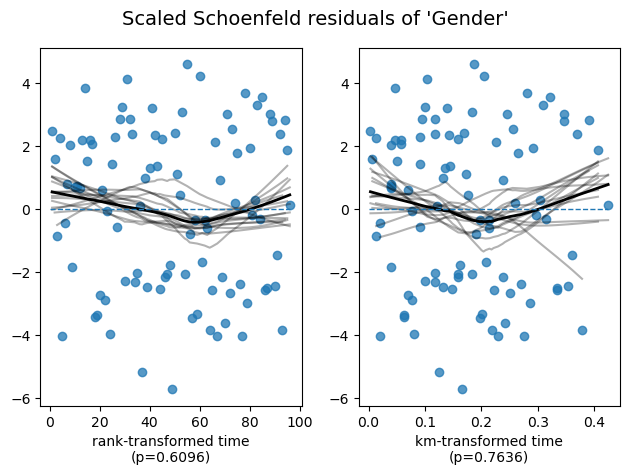

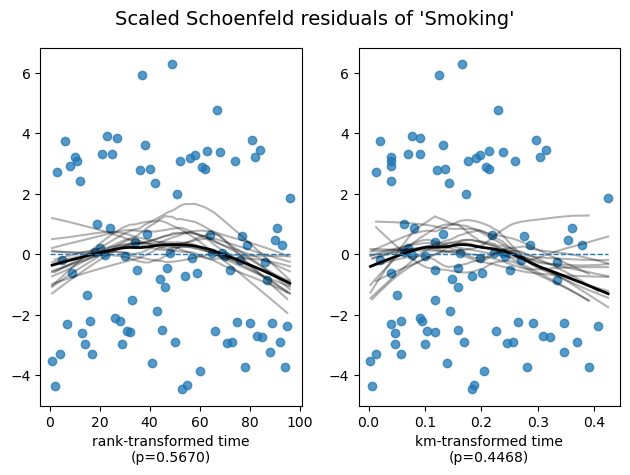

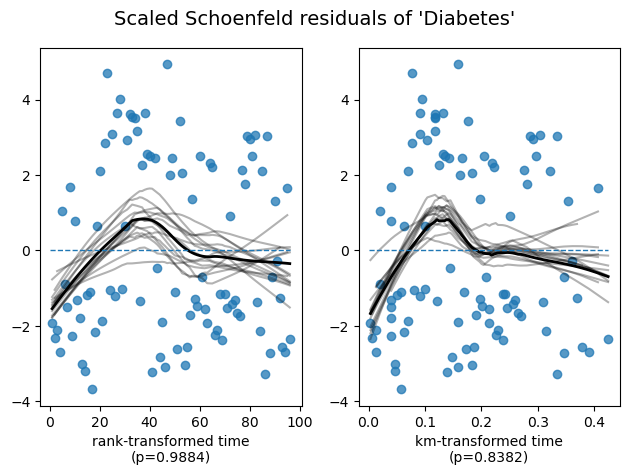

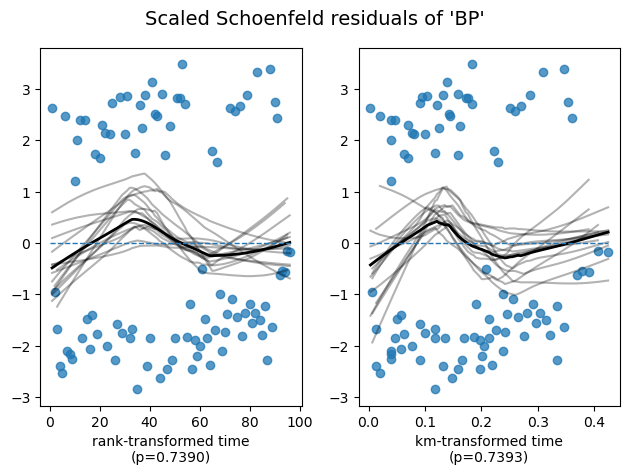

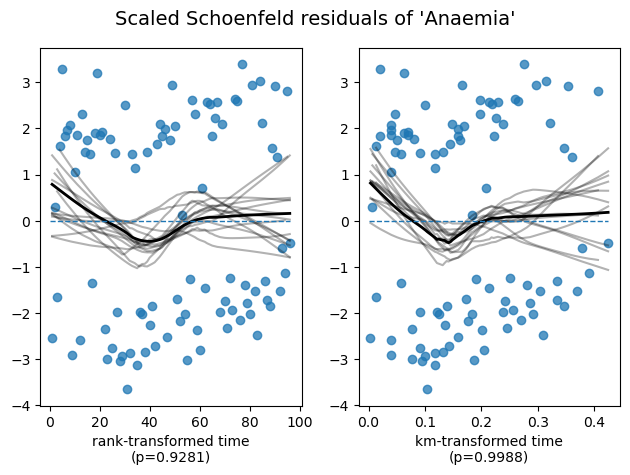

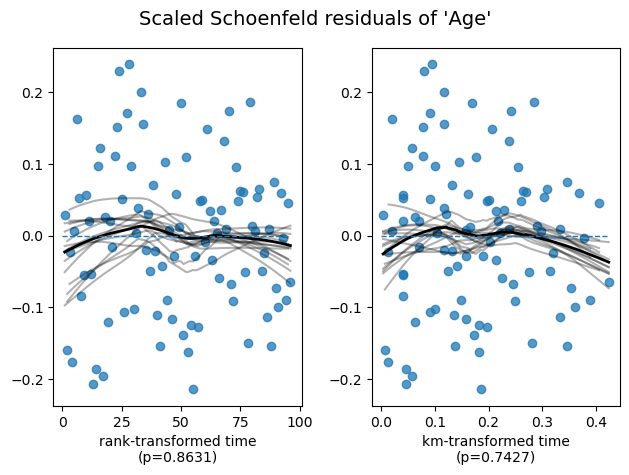

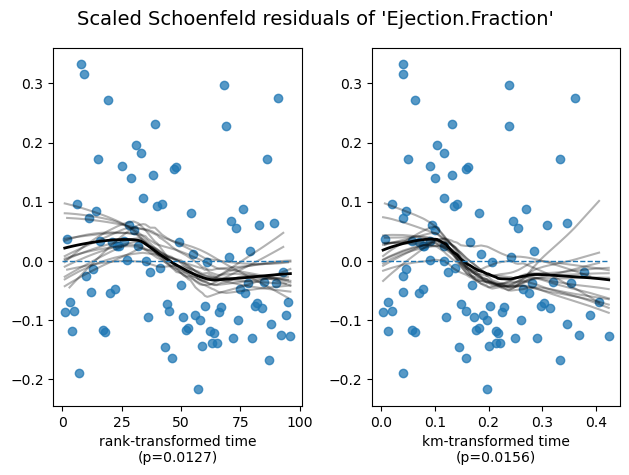

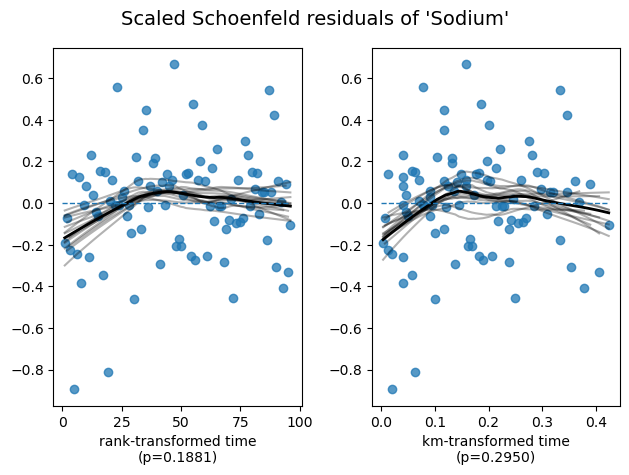

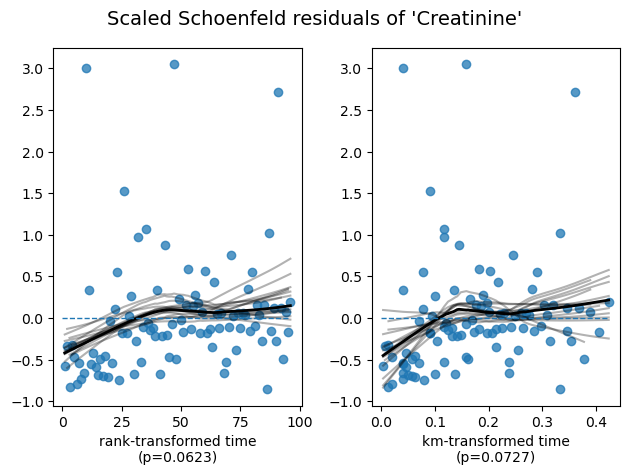

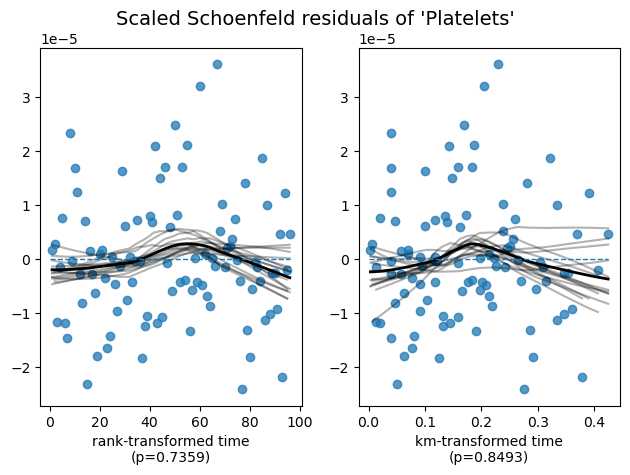

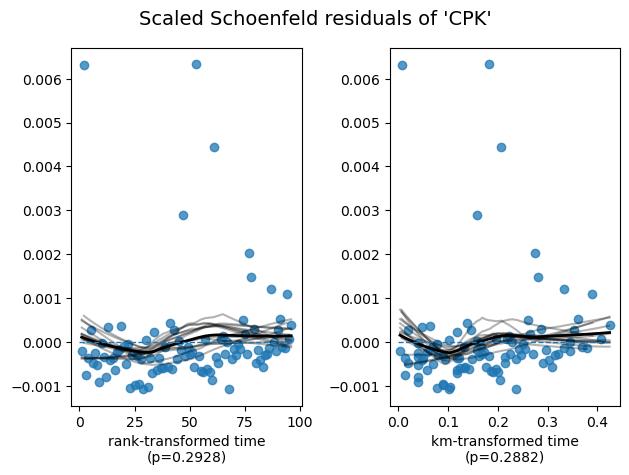

In [13]:
# Fitting a cox proportional hazards model and checking the proportional hazards assumption
cph = CoxPHFitter()
cph.fit(df, duration_col='TIME', event_col='Event')
cph.check_assumptions(df, show_plots=True)
cph.print_summary()

<Axes: xlabel='log(HR) (95% CI)'>

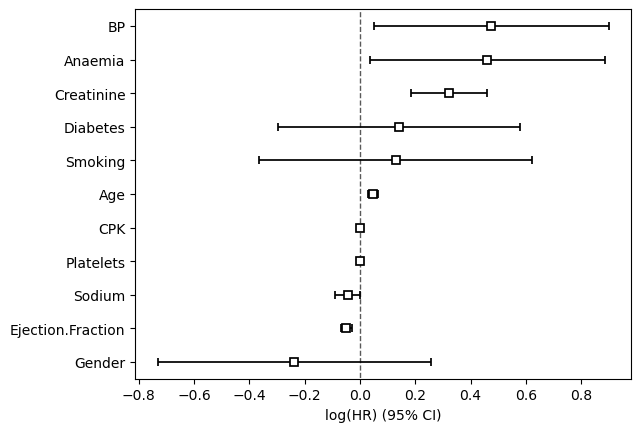

In [49]:
#  PLotting the confidence intervals for the Cox model
cph.plot()

In [6]:
# Generating the cox-snell and martingale residuals to further assess fit
residualDF = cph.compute_residuals(df, 'martingale')
residualDF

,TIME,Event,martingale
13,4.0,True,0.987369
25,6.0,True,0.992337
119,7.0,True,0.981346
159,7.0,True,0.989299
97,8.0,True,0.852351
...,...,...,...
129,270.0,False,-0.390756
170,271.0,False,-0.292954
262,278.0,False,-0.056209
62,280.0,False,-0.204079


In [200]:
residualDF['martingale'].median()

-0.11634137742621864

In [51]:
# Processing Event
event_map = {
    True: 1,
    False: 0
}
residualDF['Event'] = residualDF['Event'].map(event_map)

NameError: name 'residualDF' is not defined

In [9]:
residualDF

,TIME,Event,martingale
13,4.0,1,0.987369
25,6.0,1,0.992337
119,7.0,1,0.981346
159,7.0,1,0.989299
97,8.0,1,0.852351
...,...,...,...
129,270.0,0,-0.390756
170,271.0,0,-0.292954
262,278.0,0,-0.056209
62,280.0,0,-0.204079


In [10]:
# Calculating the Cox-Snell residuals
residualDF['cox-snell'] = residualDF['Event'] - residualDF['martingale']
residualDF

,TIME,Event,martingale,cox-snell
13,4.0,1,0.987369,0.012631
25,6.0,1,0.992337,0.007663
119,7.0,1,0.981346,0.018654
159,7.0,1,0.989299,0.010701
97,8.0,1,0.852351,0.147649
...,...,...,...,...
129,270.0,0,-0.390756,0.390756
170,271.0,0,-0.292954,0.292954
262,278.0,0,-0.056209,0.056209
62,280.0,0,-0.204079,0.204079


<Axes: xlabel='index', ylabel='martingale'>

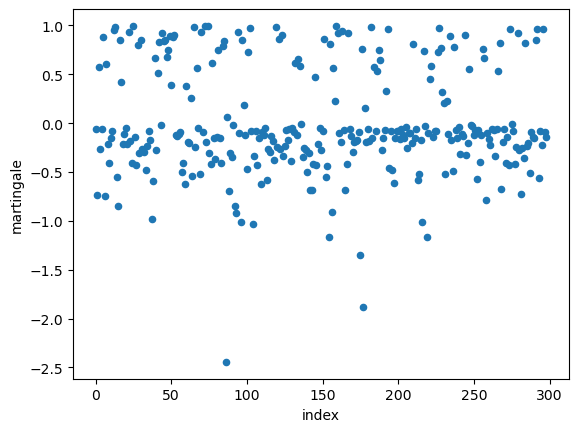

In [11]:
# Generating a scatter plot of martingale residuals
residualDF.reset_index().plot.scatter(x='index', y='martingale')

In [57]:
import numpy as np
x = np.linspace(0, 3, 100)

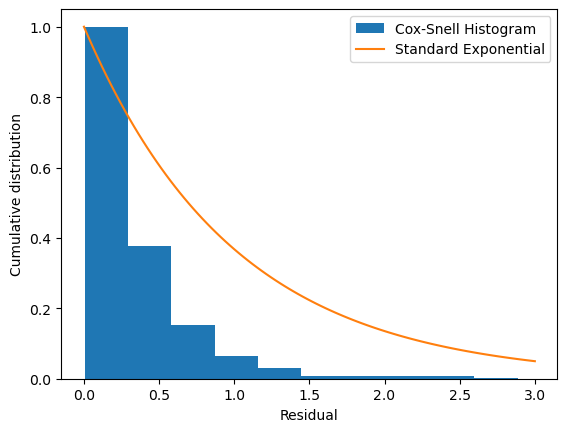

In [15]:
# Comparing cumulative distribution of cox-snell residuals to standard exponential to assess model fit
plt.hist(residualDF['cox-snell'], cumulative=-1, density=-1, label='Cox-Snell Histogram')
plt.plot(x, np.exp(-x), label='Standard Exponential')
plt.xlabel('Residual')
plt.ylabel('Cumulative distribution')
plt.legend()

In [21]:
# Using kmeans to effectively split ejection.fraction as it violates PH assumption
ef_data = df['Ejection.Fraction'].values.reshape(-1, 1)

kvals = range(2, 11)

best_score = -1
best_k = None
inertia_vals = []

for k in kvals:
    kmeans = KMeans(n_clusters=k, random_state=57)
    kmeans.fit_predict(ef_data)
    # Evaluating cluster performance
    inertia_vals.append(kmeans.inertia_)

C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Sum of squared distances, Inertia')

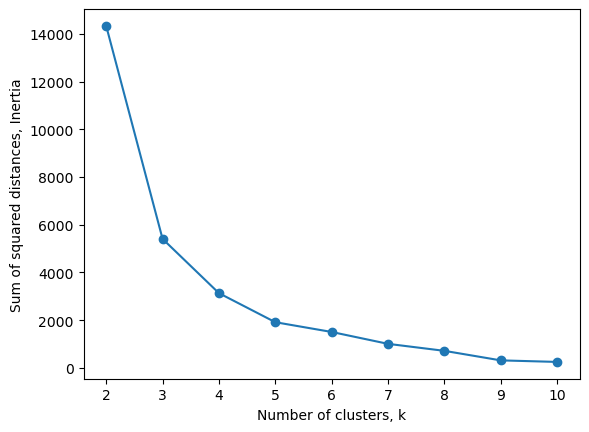

In [22]:
# Using the elbow method to decide on the best k value
plt.plot(kvals, inertia_vals, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distances, Inertia')

C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[[25.35483871]
 [56.9       ]
 [38.45890411]]


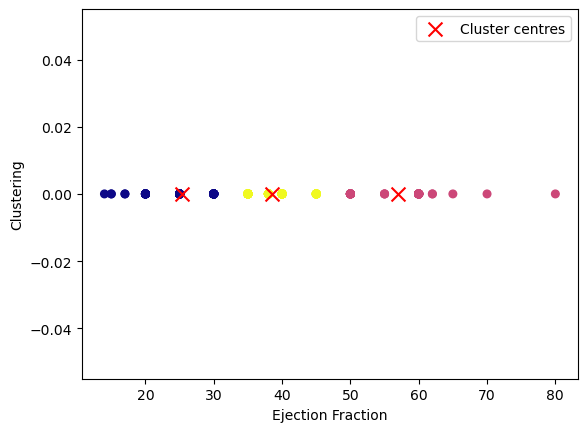

In [67]:
# Adding the cluster to the data and plotting
kmeans = KMeans(n_clusters=3, random_state=57)
df['cluster3'] = kmeans.fit_predict(ef_data)
print(kmeans.cluster_centers_)

plt.scatter(df['Ejection.Fraction'], [0]*299, c=df['cluster3'], cmap='plasma', s=30)
plt.scatter(kmeans.cluster_centers_, [0, 0, 0], c='red', marker='x', s=100, label='Cluster centres')
plt.xlabel('Ejection Fraction')
plt.ylabel('Clustering')
plt.legend()

In [36]:
df.drop(columns=['cluster'])

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK,cluster3
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358,1
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231,0
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,0
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305,0
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582,1
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582,2
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582,0
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897,2


In [43]:
# Investigating the ejection.fraction values that are taken in each cluster
print(df.groupby('cluster3')['Ejection.Fraction'].agg(['min', 'max']))

          min  max
cluster3          
0          14   30
1          50   80
2          35   45


In [39]:
dfNew = df.drop(columns=['Ejection.Fraction', 'cluster'])

In [41]:
# Standardising CPK due to strange behaviour
dfNew['CPK'] = (dfNew['CPK'] - dfNew['CPK'].min())/(dfNew['CPK'].max() - dfNew['CPK'].min())

In [42]:
dfNew

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Sodium,Creatinine,Platelets,CPK,cluster3
0,97,0,0,0,0,0,1,43.0,135,1.30,237000.00,0.042740,1
1,180,0,1,1,1,0,1,73.0,142,1.18,160000.00,0.026537,0
2,31,1,1,1,0,1,0,70.0,134,1.83,263358.03,0.071319,0
3,87,0,1,0,0,0,1,65.0,141,1.10,298000.00,0.035979,0
4,113,0,1,0,0,0,0,64.0,137,1.00,242000.00,0.202475,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,132,1.00,543000.00,0.071319,1
295,244,0,0,0,1,0,0,51.0,134,0.90,221000.00,0.071319,2
296,14,1,1,0,0,0,0,45.0,127,0.80,166000.00,0.071319,0
297,80,0,1,0,1,0,0,60.0,133,1.00,297000.00,0.111508,2



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See lin

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                 test_statistic    p  -log2(p)
Age        km              0.30 0.59      0.77
           rank            1.84 0.18      2.51
Anaemia    km              0.43 0.51      0.96
           rank            0.37 0.54      0.88
BP         km              0.16 0.69      0.54
           rank            0.13 0.72      0.48
CPK        km              0.88 0.35      1.52
           rank            0.09 0.76      0.39
Creatinine km              0.16 0.69      0.54
           rank            7.46 0.01      7.31
Diabetes   km              0.01 0.92      0.12
           rank            2.14 0.14      2.80
Gender     km              0.06 0.81      0.31
           rank            0.30 0.58      0.78
Platelets  km              0.01 0.91      0.14
           rank            0.39 0.53      0.92
Smoking    km              1.91 0.17      2.59
           rank            0.00 0.95      0.07
Sodium     km              2.77 0.10      3.38
           rank            2.61 0.11      3.24



1. Variable 'Creatinine' failed the non-proportional test: p-value is 0.0063.

   Advice 1: the functional form of the variable 'Creatinine' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Creatinine' using pd.cut, and then specify it in
`strata=['Creatinine', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-strat

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'TIME'
                event col = 'Event'
                   strata = cluster3
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -370.67
         time fit was run = 2023-11-22 15:50:00 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
Gender      -0.14       0.87       0.25            -0.63             0.36                 0.53                 1.43
Smoking      0.04       1.04       0.25            -0.45             0.53                 0.63                 1.71
Diabetes     0.15       1.16       0.22            -0.29             0.59                 0.75                 1.80
BP           0.55       1.73       0.22             0.12             0.98                 1.12                 2.66
Anaemia      0.33       1.39       0.22            -0.10             0.76                 0.90                 2.14
Age          0.05       1.06       0.01             0.03             0.07                 1.04                 1.08
Sodium      -0.05       0.96       0.02            -0.09             0.00                 0.91                 1.00
Creatinine   0.26       1.29       0.07             0.12             0.39                 1.13                 1.48
Platelets   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
CPK          1.96       7.13       0.77             0.46             3.47                 1.58                32.18

             cmp to     z      p   -log2(p)
covariate                                  
Gender         0.00 -0.54   0.59       0.77
Smoking        0.00  0.16   0.88       0.19
Diabetes       0.00  0.68   0.50       1.01
BP             0.00  2.49   0.01       6.30
Anaemia        0.00  1.50   0.13       2.92
Age            0.00  5.55 <0.005      25.03
Sodium         0.00 -1.92   0.05       4.19
Creatinine     0.00  3.65 <0.005      11.90
Platelets      0.00 -0.57   0.57       0.82
CPK            0.00  2.55   0.01       6.55
---
Concordance = 0.71
Partial AIC = 761.35
log-likelihood ratio test = 57.49 on 10 df
-log2(p) of ll-ratio test = 26.47

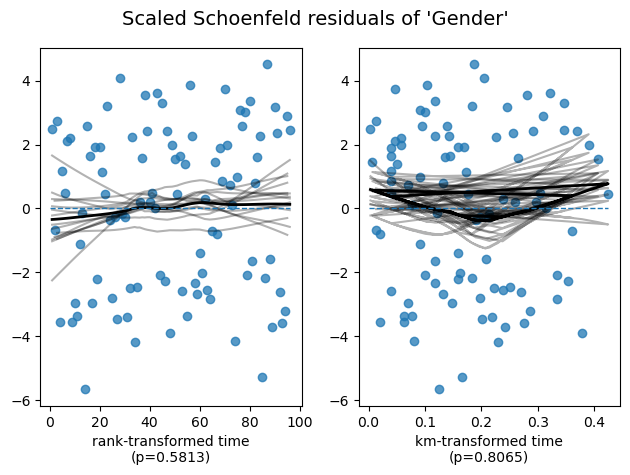

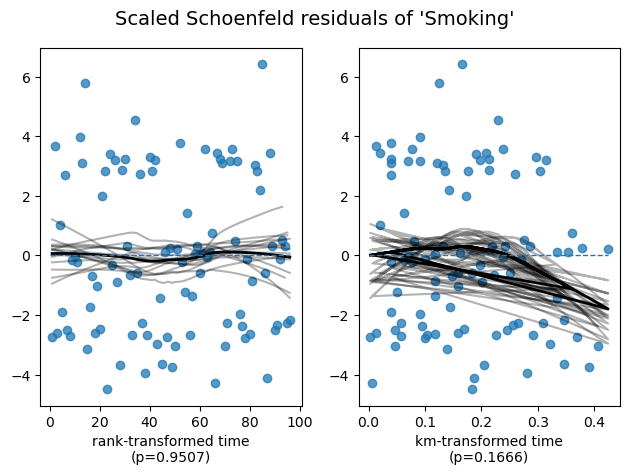

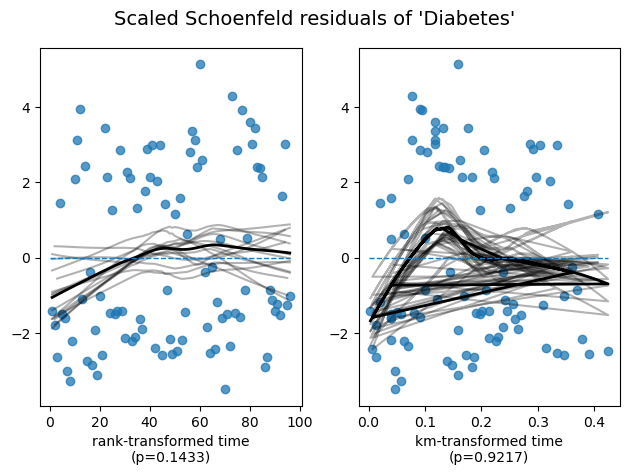

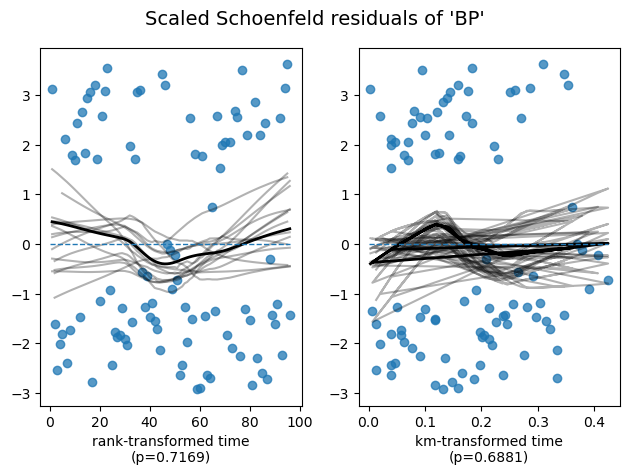

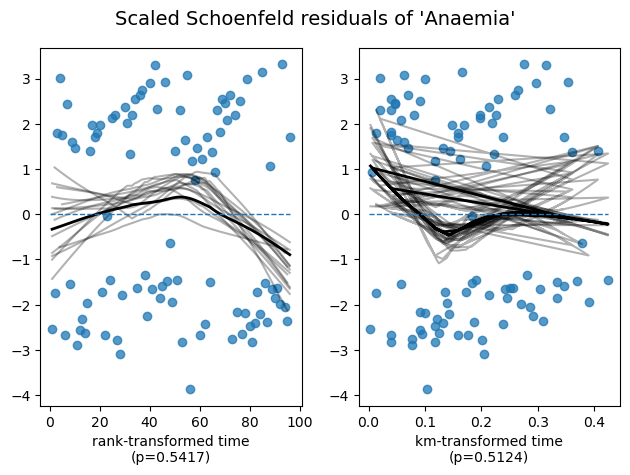

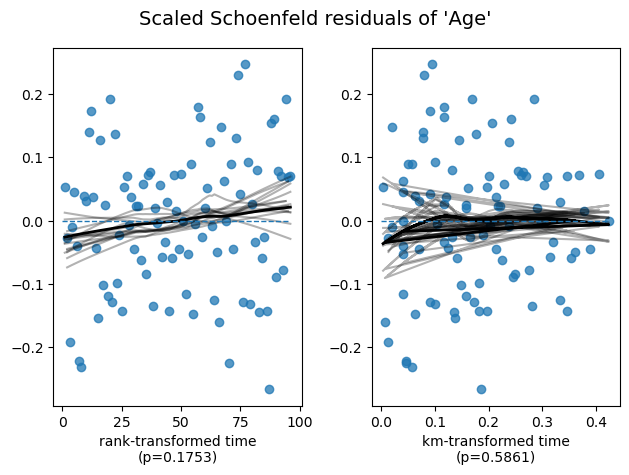

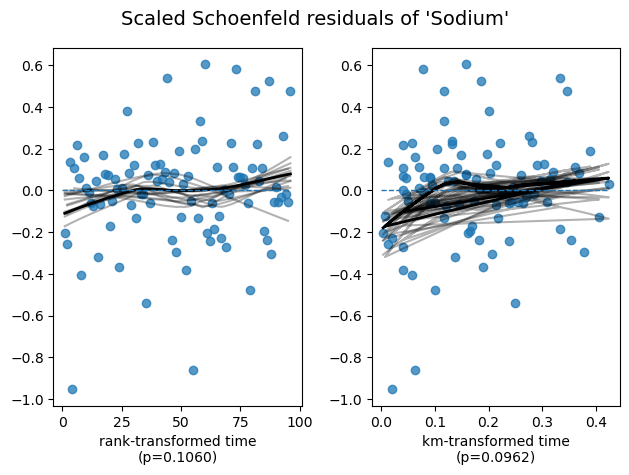

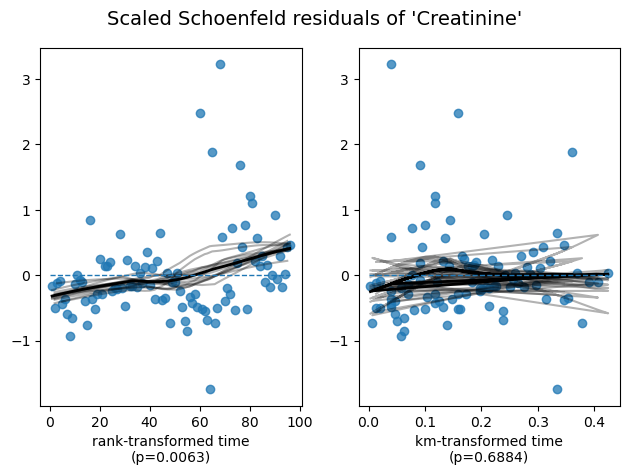

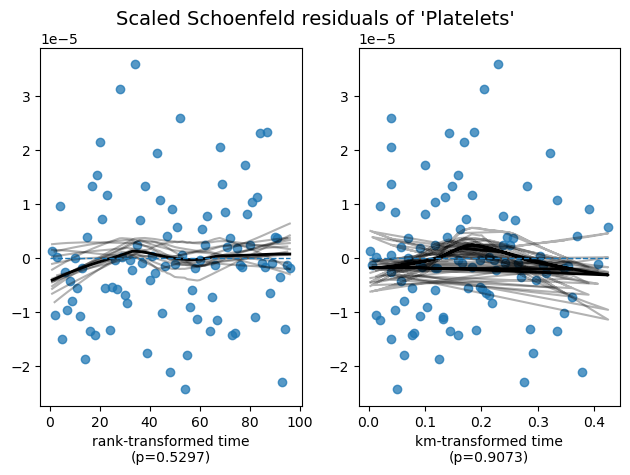

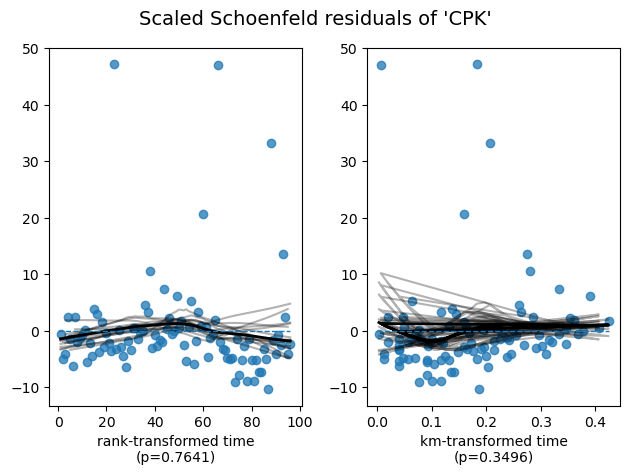

In [47]:
# Now fitting a stratified cox model and checking the PH assumption
cstrat = CoxPHFitter()
cstrat.fit(dfNew, duration_col='TIME', event_col='Event', strata=['cluster3'])
cstrat.check_assumptions(dfNew, show_plots=True)
cstrat.print_summary()

<Axes: xlabel='log(HR) (95% CI)'>

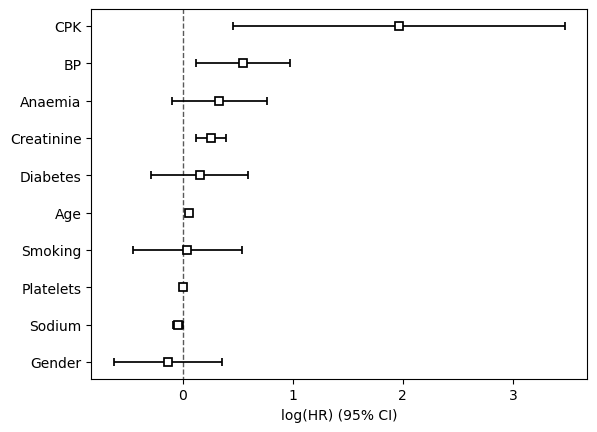

In [48]:
# PLotting confidence intervals for the stratified model
cstrat.plot()

In [60]:
# Assessing if there is any multicollinearity present in the covariates
dfCovariates = df.drop(columns=['TIME', 'Event', 'cluster3', 'cluster'])
dfCovariates

,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK
0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


<Axes: >

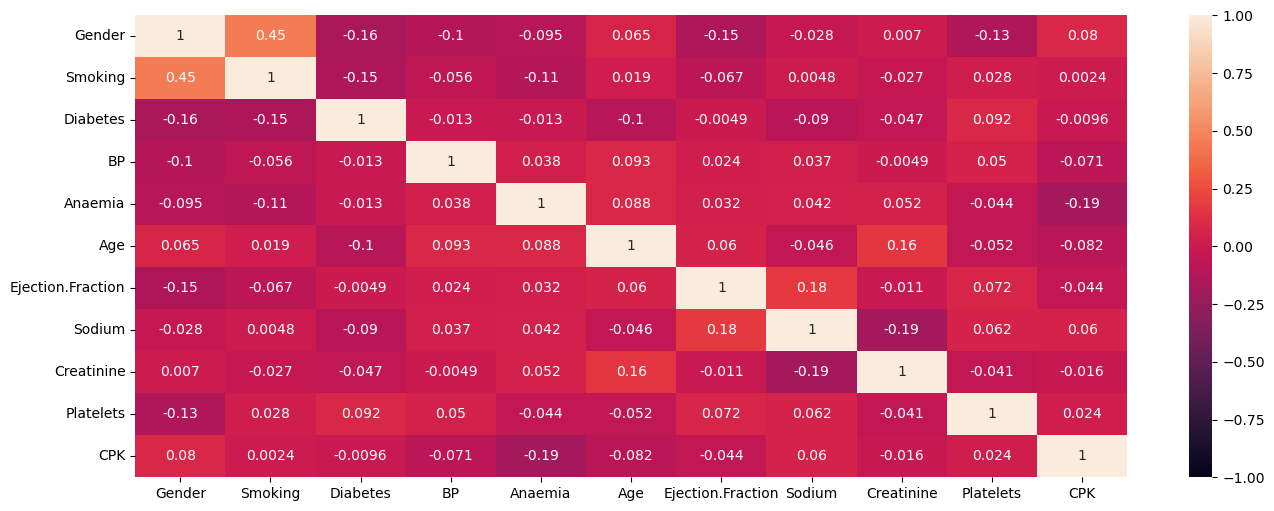

In [64]:
# Generating a heatmap representing the correlation matrix of the covariates
plt.figure(figsize=(16, 6))
sb.heatmap(dfCovariates.corr(), vmin=-1, vmax=1, annot=True)

In [50]:
# Generating the cox-snell and martingale residuals to further assess fit of stratified model
stratRes = cstrat.compute_residuals(dfNew, 'martingale')
stratRes

C:\Users\ryant\anaconda3\lib\site-packages\lifelines\utils\__init__.py:935: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


,TIME,Event,martingale
13,4.0,True,0.971745
119,7.0,True,0.973848
159,7.0,True,0.987842
97,8.0,True,0.854265
5,10.0,True,0.912791
...,...,...,...
38,270.0,False,-0.230841
129,270.0,False,-0.208890
170,271.0,False,-0.139307
62,280.0,False,-0.093831


In [52]:
event_map = {
    True: 1,
    False: 0
}

In [53]:
# Cleaning event column values
stratRes['Event'] = stratRes['Event'].map(event_map)
stratRes

,TIME,Event,martingale
13,4.0,1,0.971745
119,7.0,1,0.973848
159,7.0,1,0.987842
97,8.0,1,0.854265
5,10.0,1,0.912791
...,...,...,...
38,270.0,0,-0.230841
129,270.0,0,-0.208890
170,271.0,0,-0.139307
62,280.0,0,-0.093831


<Axes: xlabel='index', ylabel='martingale'>

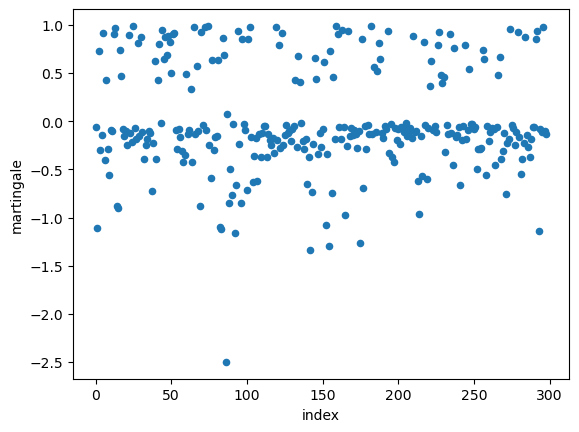

In [54]:
# Generating scatter plot of martingale residuals for stratified model
stratRes.reset_index().plot.scatter(x='index', y='martingale')

In [55]:
# Calculating cox-snell residuals for stratified model
stratRes['cox-snell'] = stratRes['Event'] - stratRes['martingale']
stratRes

,TIME,Event,martingale,cox-snell
13,4.0,1,0.971745,0.028255
119,7.0,1,0.973848,0.026152
159,7.0,1,0.987842,0.012158
97,8.0,1,0.854265,0.145735
5,10.0,1,0.912791,0.087209
...,...,...,...,...
38,270.0,0,-0.230841,0.230841
129,270.0,0,-0.208890,0.208890
170,271.0,0,-0.139307,0.139307
62,280.0,0,-0.093831,0.093831


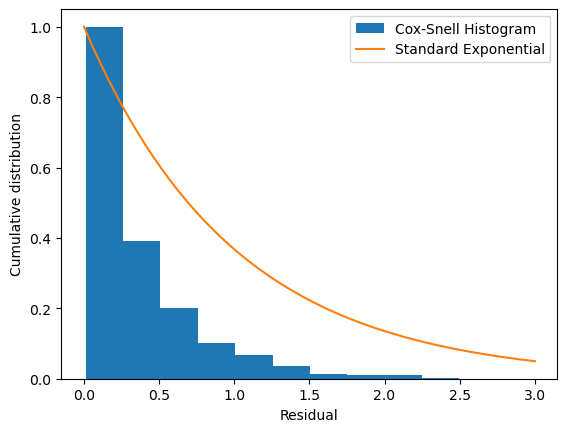

In [58]:
# Plotting histogram of cox-snell to compare with exponential for stratified model
plt.hist(stratRes['cox-snell'], cumulative=-1, density=-1, label='Cox-Snell Histogram')
plt.plot(x, np.exp(-x), label='Standard Exponential')
plt.xlabel('Residual')
plt.ylabel('Cumulative distribution')
plt.legend()

In [30]:
# Generating a KaplanMeier estimate of the survival function for different groups
kmf_anaemia = KaplanMeierFitter()
kmf_no_anaemia = KaplanMeierFitter()
kmf_BP = KaplanMeierFitter()
kmf_no_BP = KaplanMeierFitter()
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()
kmf_smoking = KaplanMeierFitter()
kmf_no_smoking = KaplanMeierFitter()
kmf_diabetes = KaplanMeierFitter()
kmf_no_diabetes = KaplanMeierFitter()

In [31]:
# Creating datasets for fitting
df_anaemia = df.loc[df['Anaemia'] == 1]
df_no_anaemia = df.loc[df['Anaemia'] == 0]
df_BP = df.loc[df['BP'] == 1]
df_no_BP = df.loc[df['BP'] == 0]
df_male = df.loc[df['Gender'] == 1]
df_female = df.loc[df['Gender'] == 0]
df_smoking = df.loc[df['Smoking'] == 1]
df_no_smoking = df.loc[df['Smoking'] == 0]
df_diabetes = df.loc[df['Diabetes'] == 1]
df_no_diabetes = df.loc[df['Diabetes'] == 0]

<Axes: xlabel='timeline'>

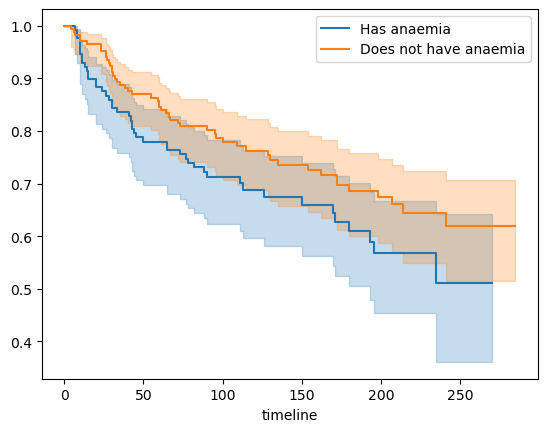

In [22]:
# Fitting and plotting the KaplanMeier estimates
kmf_anaemia.fit(df_anaemia['TIME'], df_anaemia['Event'], label='Has anaemia')
kmf_no_anaemia.fit(df_no_anaemia['TIME'], df_no_anaemia['Event'], label='Does not have anaemia')
kmf_anaemia.plot()
kmf_no_anaemia.plot()

<Axes: xlabel='timeline'>

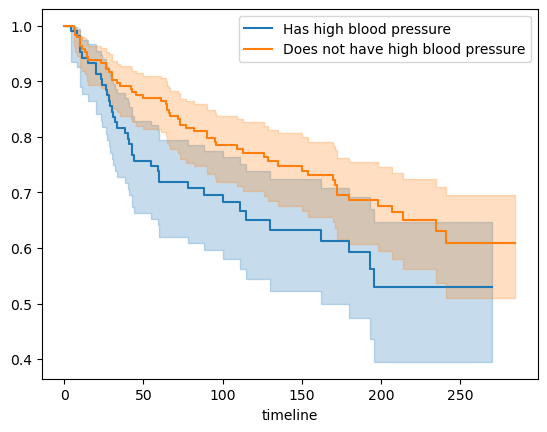

In [23]:
kmf_BP.fit(df_BP['TIME'], df_BP['Event'], label='Has high blood pressure')
kmf_no_BP.fit(df_no_BP['TIME'], df_no_BP['Event'], label='Does not have high blood pressure')
kmf_BP.plot()
kmf_no_BP.plot()

<Axes: xlabel='timeline'>

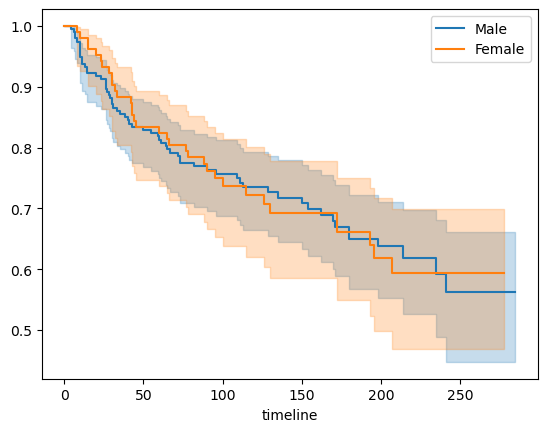

In [24]:
kmf_male.fit(df_male['TIME'], df_male['Event'], label='Male')
kmf_female.fit(df_female['TIME'], df_female['Event'], label='Female')
kmf_male.plot()
kmf_female.plot()

<Axes: xlabel='timeline'>

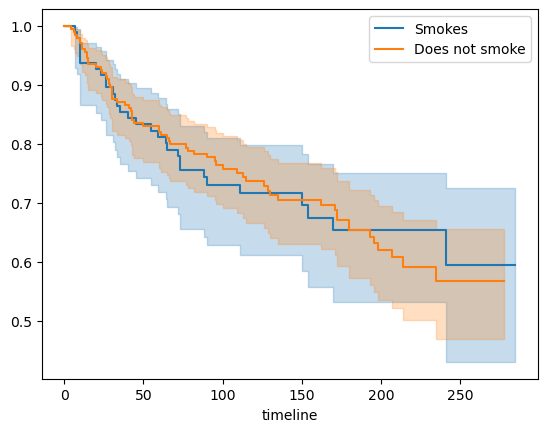

In [34]:
kmf_smoking.fit(df_smoking['TIME'], df_smoking['Event'], label='Smokes')
kmf_no_smoking.fit(df_no_smoking['TIME'], df_no_smoking['Event'], label='Does not smoke')
kmf_smoking.plot()
kmf_no_smoking.plot()

<Axes: xlabel='timeline'>

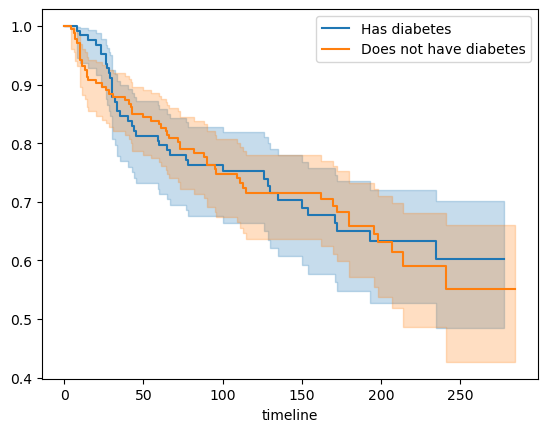

In [35]:
kmf_diabetes.fit(df_diabetes['TIME'], df_diabetes['Event'], label='Has diabetes')
kmf_no_diabetes.fit(df_no_diabetes['TIME'], df_no_diabetes['Event'], label='Does not have diabetes')
kmf_diabetes.plot()
kmf_no_diabetes.plot()

In [162]:
df = df.rename(columns={'Pletelets': 'Platelets'})

In [70]:
# Separating into separate dataframes based on the clustering to fit Kaplan-Meier estimates
df1 = df.loc[df['cluster3'] == 0]
df2 = df.loc[df['cluster3'] == 2]
df3 = df.loc[df['cluster3'] == 1]

In [71]:
# Calling Kaplan-Meier method
kmfc1 = KaplanMeierFitter()
kmfc2 = KaplanMeierFitter()
kmfc3 = KaplanMeierFitter()

Text(0.5, 0, 'time/days')

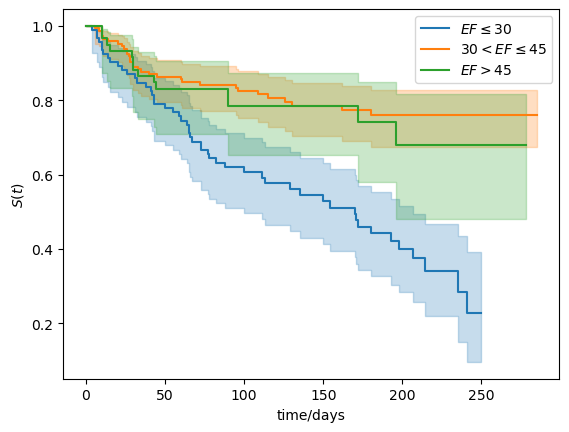

In [76]:
# Fitting and plotting Kaplan-Meier estimates
kmfc1.fit(df1['TIME'], df1['Event'], label='$EF \leq 30$')
kmfc2.fit(df2['TIME'], df2['Event'], label='$30 < EF \leq 45$')
kmfc3.fit(df3['TIME'], df3['Event'], label='$EF > 45$')
plt.xlabel('time/days')
plt.ylabel('$S(t)$')
kmfc1.plot()
kmfc2.plot()
kmfc3.plot()
plt.xlabel('time/days')